In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
intime_to_mc = 40.3628

intime_to_onbeam = 18.6927
mc_to_onbeam = 0.463117
off_to_on = 1.19153

In [3]:
#f_root = TFile("CCpi0hist_dataMCComp_v3statspandoraNu_pandoraNu.root");
#f_root = TFile("CCpi0hist_ddrStudy_FullTree.root");
f_root = TFile("CCpi0hist_dataMCComp_v4_flashtreev0_stats.root") 
h1 = f_root.Get("hFlashTrackDist_2_0") # MC BNB
h2 = f_root.Get("hFlashTrackDist_2_1") # MC BNB
h3 = f_root.Get("hFlashTrackDist_2_2") # MC BNB
h4 = f_root.Get("hFlashTrackDist_3_0") # MC InTime

h5 = f_root.Get("hFlashTrackDist_0_0") # On Beam
h6 = f_root.Get("hFlashTrackDist_1_0") # Off Beam

#print h1
f_0, edges = rn.hist2array(h1,return_edges=True)
f_1 = rn.hist2array(h2)
f_2 = rn.hist2array(h3)

f_3 = rn.hist2array(h4)
f_3 = [f_3[i]*intime_to_mc for i in xrange(len(f_3)) ]

onbeam = rn.hist2array(h5)
offbeam = rn.hist2array(h6)
bnbcos = rn.hist2array(h1)
intime = rn.hist2array(h4)

bins = (edges[0][:-1] + edges[0][1:])/2

In [4]:
# Also set up histograms for data-MC compare
intime_sc = [ intime[i] * intime_to_onbeam for i in xrange(len(intime))]
bnbcos_sc = [ bnbcos[i] * mc_to_onbeam for i in xrange(len(bnbcos))]
offbeam_sc = [ offbeam[i] * off_to_on for i in xrange(len(offbeam))]

on_minus_off = [ onbeam[i] - offbeam_sc[i] for i in xrange(len(onbeam))]
bnb_plus_intime = [bnbcos_sc[i] + intime_sc[i] for i in xrange(len(bnbcos_sc))]

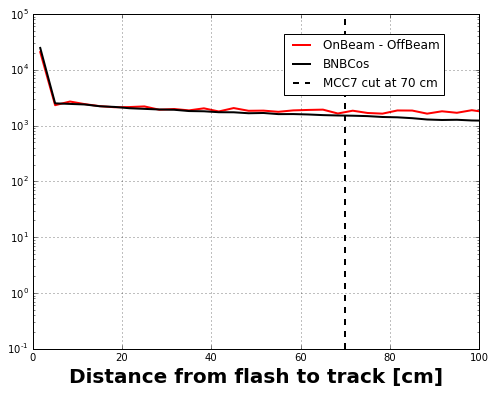

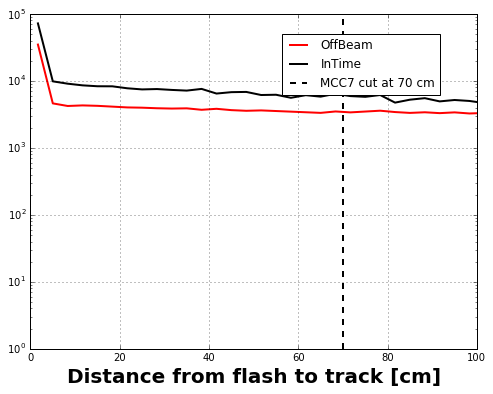

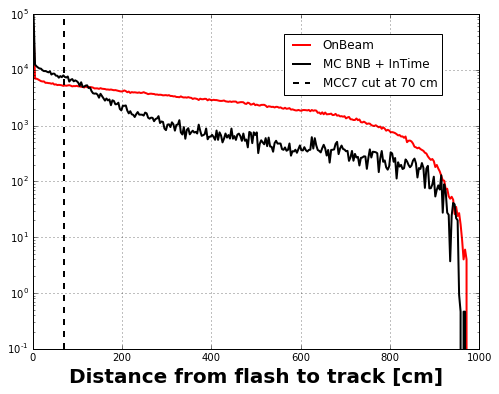

In [5]:
cut = 70

plt.figure(figsize=(8,6))
plt.plot(bins,on_minus_off,'r-',label='OnBeam - OffBeam',lw=2)#,marker='o')
plt.plot(bins,bnbcos_sc,'k-',label='BNBCos',lw=2)#,marker='.')
plt.axvline(cut,linestyle='--',color='k',lw=2,label='MCC7 cut at %.0f cm'%cut)
plt.grid(True)
plt.xlabel('Distance from flash to track [cm]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(0.55,0.85))
plt.yscale('log')
#plt.ylim(10**3,10**6)
plt.xlim(0,100)


plt.figure(figsize=(8,6))
plt.plot(bins,offbeam_sc,'r-',label='OffBeam',lw=2)#,marker='o')
#plt.plot(bins,bnbcos_sc,'b-',label='Scaled BNBCos',lw=2)#,marker='.')
plt.plot(bins,intime_sc,'k-',label='InTime',lw=2)#,marker='o')
plt.axvline(cut,linestyle='--',color='k',lw=2,label='MCC7 cut at %.0f cm'%cut)
plt.grid(True)
plt.xlabel('Distance from flash to track [cm]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(0.55,0.85))
plt.yscale('log')
plt.xlim(0,100)

plt.figure(figsize=(8,6))
plt.plot(bins,onbeam,'r-',label='OnBeam',lw=2)#,marker='o')
plt.plot(bins,bnb_plus_intime,'k-',label='MC BNB + InTime',lw=2)#,marker='o')
plt.axvline(cut,linestyle='--',color='k',lw=2,label='MCC7 cut at %.0f cm'%cut)
plt.grid(True)
plt.xlabel('Distance from flash to track [cm]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(0.55,0.85))
plt.yscale('log')
#plt.xlim(0,200)



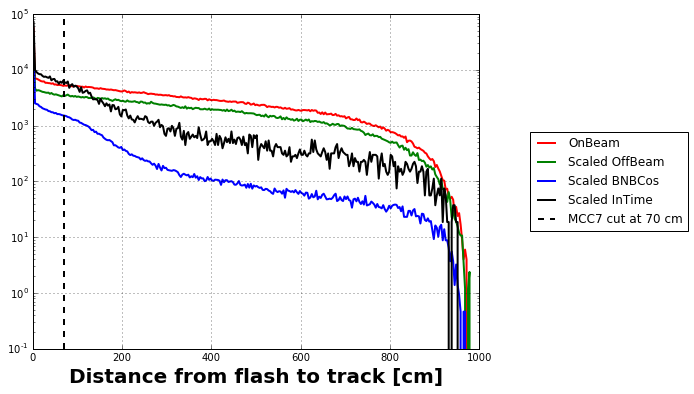

In [20]:
cut = 70

plt.figure(figsize=(8,6))
plt.plot(bins,onbeam,'r-',label='OnBeam',lw=2)#,marker='o')
plt.plot(bins,offbeam_sc,'g-',label='Scaled OffBeam',lw=2)#,marker='o')
plt.plot(bins,bnbcos_sc,'b-',label='Scaled BNBCos',lw=2)#,marker='.')
#plt.plot(bins,f_1,'g-',label='Cosmic',lw=2)#,marker='')
#plt.plot(bins,f_2,'r-',label='Neutrino',lw=2)#,marker='o')
plt.plot(bins,intime_sc,'k-',label='Scaled InTime',lw=2)#,marker='o')

plt.axvline(cut,linestyle='--',color='k',lw=2,label='MCC7 cut at %.0f cm'%cut)
plt.grid(True)
plt.xlabel('Distance from flash to track [cm]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1.1,0.5))
plt.yscale('log')
#plt.xlim(0,200)

tot = np.cumsum(f_0)[-1] + np.cumsum(f_3)[-1]
tot_cos = np.cumsum(f_1)[-1] + np.cumsum(f_3)[-1]
tot_nu = np.cumsum(f_2)[-1] 

eff = [ float(np.cumsum(f_2[:i])[-1]) / tot_nu for i in xrange(1,len(f_2)+1,5) ] 
misid = [ float(np.cumsum(f_1[:i])[-1] + np.cumsum(f_3[:i])[-1]) / tot for i in xrange(1,len(f_2)+1,5) ] 
pur = [ float(np.cumsum(f_2[:i])[-1]) / tot for i in xrange(1,len(f_2)+1,5) ]

ratio = [float(np.cumsum(f_2[:i])[-1])/math.sqrt(float(np.cumsum(f_2[:i])[-1])**2 + \
        (float(np.cumsum(f_1[:i])[-1] + np.cumsum(f_3[:i])[-1]))**2) for i in xrange(1,len(f_2)+1,5) ]
         
#ax2 = plt.twinx()
#plt.plot(bins[::5],eff,'k-',label="Nu Eff",marker='o')       
#plt.plot(bins[::5],misid,'-',color='purple', label="MisID",marker='o')
#plt.plot(bins[::5],ratio,'-',color='orange',label="Sig/sqrt(Sig^2 + Bkgd^2)",marker='o')
#plt.legend(loc=(1.1,0.8))
#ax2.set_ylabel('Efficiency', color='k',fontsize=20,weight='bold')

#plt.xlim(0,150)        
#plt.ylim(0,0.1)

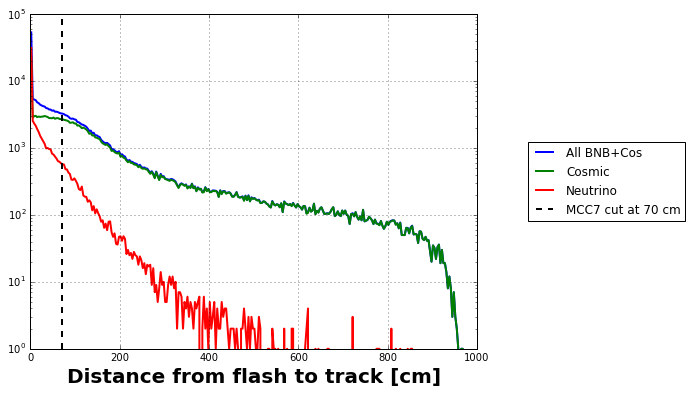

In [7]:
cut = 70

plt.figure(figsize=(8,6))
#plt.plot(bins,onbeam,'r-',label='OnBeam',lw=2)#,marker='o')
#plt.plot(bins,offbeam_sc,'g-',label='Scaled OffBeam',lw=2)#,marker='o')
plt.plot(bins,bnbcos,'b-',label='All BNB+Cos',lw=2)#,marker='.')
plt.plot(bins,f_1,'g-',label='Cosmic',lw=2)#,marker='')
plt.plot(bins,f_2,'r-',label='Neutrino',lw=2)#,marker='o')
#plt.plot(bins,intime_sc,'k-',label='Scaled InTime',lw=2)#,marker='o')
plt.axvline(cut,linestyle='--',color='k',lw=2,label='MCC7 cut at %.0f cm'%cut)
plt.grid(True)
plt.xlabel('Distance from flash to track [cm]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1.1,0.5))
plt.yscale('log')
#plt.xlim(0,200)

60 60


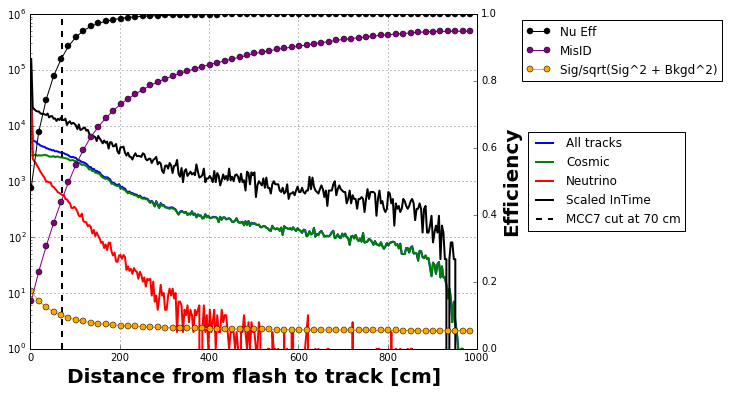

In [13]:
cut = 70

plt.figure(figsize=(8,6))
plt.plot(bins,f_0,'b-',label='All tracks',lw=2)#,marker='.')
plt.plot(bins,f_1,'g-',label='Cosmic',lw=2)#,marker='')
plt.plot(bins,f_2,'r-',label='Neutrino',lw=2)#,marker='o')
plt.plot(bins,f_3,'k-',label='Scaled InTime',lw=2)#,marker='o')
plt.axvline(cut,linestyle='--',color='k',lw=2,label='MCC7 cut at %.0f cm'%cut)
plt.grid(True)
plt.xlabel('Distance from flash to track [cm]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1.1,0.5))
plt.yscale('log')
#plt.xlim(0,200)

tot = np.cumsum(f_0)[-1] + np.cumsum(f_3)[-1]
tot_cos = np.cumsum(f_1)[-1] + np.cumsum(f_3)[-1]
tot_nu = np.cumsum(f_2)[-1] 

eff = [ float(np.cumsum(f_2[:i])[-1]) / tot_nu for i in xrange(1,len(f_2)+1,5) ] 
misid = [ float(np.cumsum(f_1[:i])[-1] + np.cumsum(f_3[:i])[-1]) / tot for i in xrange(1,len(f_2)+1,5) ] 
pur = [ float(np.cumsum(f_2[:i])[-1]) / tot for i in xrange(1,len(f_2)+1,5) ]
#eff =eff[:-1]


mult = [eff[i] * pur[i] for i in xrange(len(eff))]    

ratio = [float(np.cumsum(f_2[:i])[-1])/math.sqrt(float(np.cumsum(f_2[:i])[-1])**2 + \
        (float(np.cumsum(f_1[:i])[-1] + np.cumsum(f_3[:i])[-1]))**2) for i in xrange(1,len(f_2)+1,5) ]
         
         
#eff[i]/math.sqrt(eff[i]*eff[i] + misid[i]*misid[i]) for i in xrange(len(eff))]
print len(pur), len(eff)

ax2 = plt.twinx()
plt.plot(bins[::5],eff,'k-',label="Nu Eff",marker='o')       
#plt.plot(bins[::5],pur,'g-',label="Nu Purity",marker='o')       
#plt.plot(bins[::5],mult,'b-',label="Eff * Pur",marker='o')
plt.plot(bins[::5],misid,'-',color='purple', label="MisID",marker='o')
plt.plot(bins[::5],ratio,'-',color='orange',label="Sig/sqrt(Sig^2 + Bkgd^2)",marker='o')

plt.legend(loc=(1.1,0.8))
ax2.set_ylabel('Efficiency', color='k',fontsize=20,weight='bold')

#plt.xlim(0,150)        
#plt.ylim(0,0.1)

In [118]:
intime_to_onbeam = 18.6927
mc_to_onbeam = 0.463117
off_to_on = 1.19153

flash_v = rn.root2array('CCpi0hist_dataMCComp_v4_flashtreev0_stats.root',treename='flash_tree')
df = pd.DataFrame(flash_v)

offbeam_df = df.query('sample == 1')
intime_df = df.query('sample == 3')

intime = intime_df.drop_duplicates(['event_ahack'])
offbeam = offbeam_df.drop_duplicates(['event_ahack'])

in_z = intime.flash_z.values
off_z = offbeam.flash_z.values

in_dist = intime.flash_dist.values
off_dist = offbeam.flash_dist.values

in_dist_abs = [abs(i) for i in intime.flash_dist.values]
off_dist_abs = [abs(i) for i in offbeam.flash_dist.values]

In [89]:
x, y = np.histogram(in_z,bins=60)
x_off, y_off = np.histogram(off_z,bins=60)

edges = (y_off[:-1] + y_off[1:])/2

intime_sc = [ x[i] * intime_to_onbeam for i in xrange(len(x))]
offbeam_sc = [ x_off[i] * off_to_on for i in xrange(len(x_off))]



In [121]:
x_d, y_d = np.histogram(in_dist,bins=150)
x_offd, y_offd = np.histogram(off_dist,bins=150)
edges_dist = (y_d[:-1] + y_d[1:])/2

in_d_sc = [ x_d[i] * intime_to_onbeam for i in xrange(len(x_d))]
off_d_sc = [ x_offd[i] * off_to_on for i in xrange(len(x_offd))]

In [122]:
x_d_abs, y_d_abs = np.histogram(in_dist_abs,bins=150)
x_off_absd, y_off_absd = np.histogram(off_dist_abs,bins=150)
edges_abs_dist = (y_d_abs[:-1] + y_d_abs[1:])/2

in_d_ab = [ x_d_abs[i] * intime_to_onbeam for i in xrange(len(x_d_abs))]
off_d_ab = [ x_off_absd[i] * off_to_on for i in xrange(len(x_off_absd))]

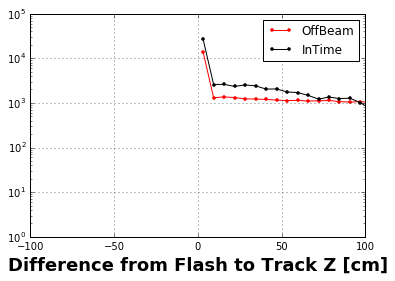

In [125]:
plt.plot(edges_abs_dist, off_d_ab,'r-',label='OffBeam',marker='.')
plt.plot(edges_abs_dist, in_d_ab,'k-',label='InTime',marker='.') 
plt.xlabel('Difference from Flash to Track Z [cm]',fontsize=18,weight='bold')
plt.grid(True)
#plt.yscale('log')
plt.xlim(-100,100)
plt.legend()#loc='upper left',bbox_to_anchor=(1,0.5))

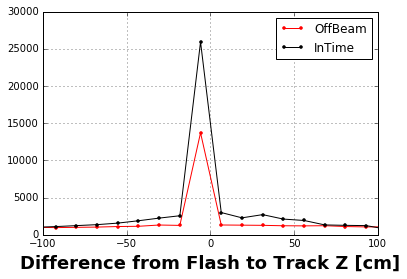

In [123]:
plt.plot(edges_dist, off_d_sc,'r-',label='OffBeam',marker='.')
plt.plot(edges_dist, in_d_sc,'k-',label='InTime',marker='.') 
plt.xlabel('Difference from Flash to Track Z [cm]',fontsize=18,weight='bold')
plt.grid(True)
plt.xlim(-100,100)
plt.legend()#loc='upper left',bbox_to_anchor=(1,0.5))

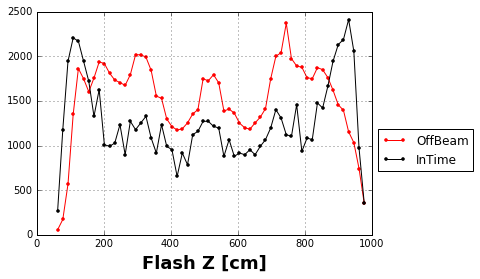

In [81]:
nbins=30
n=False #True
plt.plot(edges, offbeam_sc,'r-',label='OffBeam',marker='.')
plt.plot(edges, intime_sc,'k-',label='InTime',marker='.') 
#_,_,_ = plt.hist(intime_sc,bins=nbins,histtype='step',fill=None,edgecolor='k',lw=2,label='inTime')#,range=(0,1100))
#_,_,_ = plt.hist(off_z,bins=nbins,histtype='step',normed=n,fill=None,edgecolor='r',lw=2,label='OffBeam')#,range=(0,1100)) 
#_,_,_ = plt.hist(in_z,bins=nbins,histtype='step',normed=n,fill=None,edgecolor='k',lw=2,label='inTime')#,range=(0,1100))
plt.xlabel('Flash Z [cm]',fontsize=18,weight='bold')
plt.grid(True)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
#plt.ylim(0,16)